In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Match styling (font scale, whitegrid) used in energy-over-time/Plot3.ipynb
sns.set_theme(style='whitegrid', font_scale=1.7)

# Raw data (millicores for CPU, MiB for Memory)
data = pd.DataFrame({
    'UEs': [256, 1024, 4096, 8192],
    'rApp CPU (millicores)': [0.001306, 0.001444, 0.001477, 0.0173],
    'rApp MEM (MiB)': [24.55, 28.1, 30.24, 75.0],
    'xApp Monitoring CPU (millicores)': [0.000886, 0.001797, 0.00677, 0.01265],
    'xApp Monitoring MEM (MiB)': [11.58, 25.29, 68.0, 183.6],
    'xApp Handover CPU (millicores)': [0.0002528, 0.000168, 0.0003495, 0.001018],
    'xApp Handover MEM (MiB)': [5.95, 6.09, 6.18, 12.22]
})

data.head()

,UEs,rApp CPU (millicores),rApp MEM (MiB),xApp Monitoring CPU (millicores),xApp Monitoring MEM (MiB),xApp Handover CPU (millicores),xApp Handover MEM (MiB)
0,256,0.001306,24.55,0.000886,11.58,0.000253,5.95
1,1024,0.001444,28.10,0.001797,25.29,0.000168,6.09
2,4096,0.001477,30.24,0.006770,68.00,0.000349,6.18
3,8192,0.017300,75.00,0.012650,183.60,0.001018,12.22


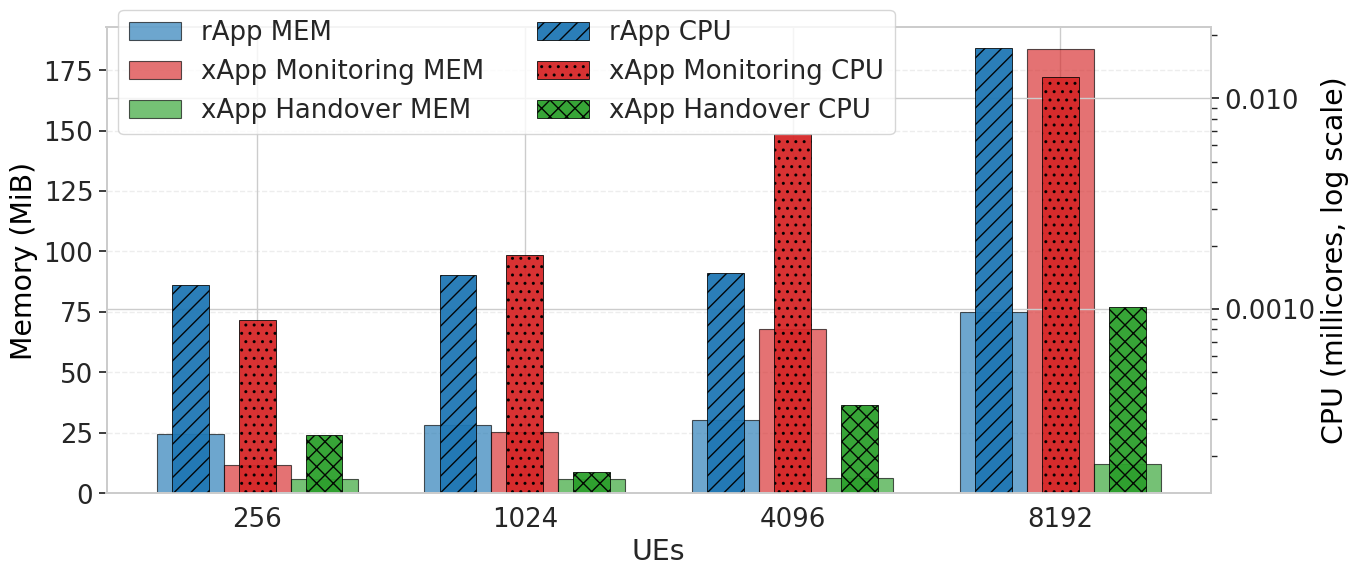

,UEs,rApp CPU (millicores),rApp MEM (MiB),xApp Monitoring CPU (millicores),xApp Monitoring MEM (MiB),xApp Handover CPU (millicores),xApp Handover MEM (MiB)
0,256,0.001306,24.55,0.000886,11.58,0.000253,5.95
1,1024,0.001444,28.10,0.001797,25.29,0.000168,6.09
2,4096,0.001477,30.24,0.006770,68.00,0.000349,6.18
3,8192,0.017300,75.00,0.012650,183.60,0.001018,12.22


In [4]:
# Dual-axis bar+bar plot styled similar to Plot3 (font_scale already set in cell 1)
import matplotlib.ticker as mticker

cpu_cols = {
    'rApp CPU (millicores)': 'rApp',
    'xApp Monitoring CPU (millicores)': 'xApp Monitoring',
    'xApp Handover CPU (millicores)': 'xApp Handover'
}
mem_cols = {
    'rApp MEM (MiB)': 'rApp',
    'xApp Monitoring MEM (MiB)': 'xApp Monitoring',
    'xApp Handover MEM (MiB)': 'xApp Handover'
}
components = ['rApp', 'xApp Monitoring', 'xApp Handover']
# Map to colors approximating style consistency (blue, orange, green from default cycle)
color_cycle = ['tab:blue', 'tab:red', 'tab:green']
palette = {comp: color_cycle[i] for i, comp in enumerate(components)}

ue_order = sorted(data['UEs'].unique())
bar_width = 0.25
cpu_width = bar_width * 0.55
x = np.arange(len(ue_order))

fig, ax_mem = plt.subplots(figsize=(14,6))  # width similar to Plot3 first figure (14 x 6)
ax_cpu = ax_mem.twinx()

# Memory bars grouped
for i, comp in enumerate(components):
    mem_col = [c for c,v in mem_cols.items() if v == comp][0]
    mem_vals = [data.loc[data['UEs']==ue, mem_col].values[0] for ue in ue_order]
    positions = x + (i - (len(components)-1)/2) * bar_width
    ax_mem.bar(positions, mem_vals, bar_width, color=palette[comp], alpha=0.65, edgecolor='black', linewidth=0.8, label=f"{comp} MEM")

# CPU bars with hatch overlays
hatches = {'rApp':'//', 'xApp Monitoring':'..', 'xApp Handover':'xx'}
for i, comp in enumerate(components):
    cpu_col = [c for c,v in cpu_cols.items() if v == comp][0]
    cpu_vals = [data.loc[data['UEs']==ue, cpu_col].values[0] for ue in ue_order]
    positions = x + (i - (len(components)-1)/2) * bar_width
    ax_cpu.bar(positions, cpu_vals, cpu_width, color=palette[comp], alpha=0.95, hatch=hatches[comp], edgecolor='black', linewidth=0.6, label=f"{comp} CPU")

# Axis formatting
ax_mem.set_xticks(x)
ax_mem.set_xticklabels(ue_order)
ax_mem.set_xlabel('UEs')
ax_mem.set_ylabel('Memory (MiB)', color='black')
ax_mem.grid(axis='y', linestyle='--', alpha=0.35)

ax_cpu.set_ylabel('CPU (millicores, log scale)', color='black')
ax_cpu.set_yscale('log')
ax_cpu.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, pos: f"{v:.5f}" if v < 0.001 else (f"{v:.4f}" if v < 0.01 else (f"{v:.3f}" if v < 0.1 else f"{v:g}"))))

# Legend (deduplicate)
mem_handles, mem_labels = ax_mem.get_legend_handles_labels()
cpu_handles, cpu_labels = ax_cpu.get_legend_handles_labels()
all_handles = mem_handles + cpu_handles
all_labels = mem_labels + cpu_labels
seen = set()
handles_final, labels_final = [], []
for h,l in zip(all_handles, all_labels):
    if l not in seen:
        handles_final.append(h); labels_final.append(l); seen.add(l)
fig.legend(handles_final, labels_final, loc='upper left', ncol=2, frameon=True, bbox_to_anchor=(0.09, 1))

# Tight layout and save
fig.tight_layout()
os.makedirs('out', exist_ok=True)
plt.savefig('out/resource-usage.pdf', bbox_inches='tight')
plt.savefig('out/resource-usage.png', dpi=300, bbox_inches='tight')
plt.show()

data